In [4]:
from sklearn.datasets import load_iris

# 导入 IRIS 数据集
iris = load_iris()

(150, 4)

In [7]:
# 特征矩阵
iris.data
# 目标向量
iris.target

print('特征 shape: ', iris.data.shape)
print('目标 shape: ', iris.target.shape)

特征 shape:  (150, 4)
目标 shape:  (150,)


## 数据预处理　　

通过特征提取，我们能得到未经处理的特征，这时的特征可能有以下问题：

* 不属于同一量纲：即特征的规格不一样，不能够放在一起比较。无量纲化可以解决这一问题。
* 信息冗余：对于某些定量特征，其包含的有效信息为区间划分，例如学习成绩，假若只关心“及格”或不“及格”，那么需要将定量的考分，转换成“1”和“0”表示及格和未及格。二值化可以解决这一问题。
* 定性特征不能直接使用：某些机器学习算法和模型只能接受定量特征的输入，那么需要将定性特征转换为定量特征。最简单的方式是为每一种定性值指定一个定量值，但是这种方式过于灵活，增加了调参的工作。通常使用哑编码的方式将定性特征转换为定量特征：假设有N种定性值，则将这一个特征扩展为N种特征，当原始特征值为第i种定性值时，第i个扩展特征赋值为1，其他扩展特征赋值为0。哑编码的方式相比直接指定的方式，不用增加调参的工作，对于线性模型来说，使用哑编码后的特征可达到非线性的效果。
* 存在缺失值：缺失值需要补充。
* 信息利用率低：不同的机器学习算法和模型对数据中信息的利用是不同的，之前提到在线性模型中，使用对定性特征哑编码可以达到非线性的效果。类似地，对定量变量多项式化，或者进行其他的转换，都能达到非线性的效果。　　

我们使用sklearn中的preproccessing库来进行数据预处理，可以覆盖以上问题的解决方案。

### 无量钢化

无量纲化使不同规格的数据转换到同一规格。常见的无量纲化方法有标准化和区间缩放法。标准化的前提是特征值服从正态分布，标准化后，其转换成标准正态分布。区间缩放法利用了边界值信息，将特征的取值区间缩放到某个特点的范围，例如[0, 1]等。

#### 标准化

标准化需要计算特征的均值和标准差，公式表达为：　　使用preproccessing库的StandardScaler类对数据进行标准化的代码如下：<img src="https://pic2.zhimg.com/50/c7e852db6bd05b7bb1017b5425ffeec1_hd.png" data-rawwidth="81" data-rawheight="48" class="content_image" width="81">

In [8]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [9]:
from sklearn.preprocessing import StandardScaler

# 标准化, 返回值为标准化后的数据
iris_standard = StandardScaler().fit_transform(iris.data)

#### 区间缩放法

区间缩放法的思路有多种，常见的一种为利用两个最值进行缩放，公式表达为：
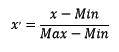
使用preproccessing库的MinMaxScaler类对数据进行区间缩放的代码如下：

In [11]:
from sklearn.preprocessing import MinMaxScaler

#区间缩放，返回值为缩放到[0, 1]区间的数据
iris_minmax = MinMaxScaler().fit_transform(iris.data)

#### 标准化与归一化的区别　　

简单来说，标准化是依照特征矩阵的列处理数据，其通过求z-score的方法，将样本的特征值转换到同一量纲下。归一化是依照特征矩阵的行处理数据，其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准，也就是说都转化为“单位向量”。规则为l2的归一化公式如下：<img src="https://pic1.zhimg.com/50/fbb2fd0a163f2fa211829b735194baac_hd.png" data-rawwidth="113" data-rawheight="57" class="content_image" width="113">　　
使用preproccessing库的Normalizer类对数据进行归一化的代码如下：

In [13]:
from sklearn.preprocessing import Normalizer

#归一化，返回值为归一化后的数据
iris_norm = Normalizer().fit_transform(iris.data)

In [14]:
iris_norm

array([[ 0.80377277,  0.55160877,  0.22064351,  0.0315205 ],
       [ 0.82813287,  0.50702013,  0.23660939,  0.03380134],
       [ 0.80533308,  0.54831188,  0.2227517 ,  0.03426949],
       [ 0.80003025,  0.53915082,  0.26087943,  0.03478392],
       [ 0.790965  ,  0.5694948 ,  0.2214702 ,  0.0316386 ],
       [ 0.78417499,  0.5663486 ,  0.2468699 ,  0.05808704],
       [ 0.78010936,  0.57660257,  0.23742459,  0.0508767 ],
       [ 0.80218492,  0.54548574,  0.24065548,  0.0320874 ],
       [ 0.80642366,  0.5315065 ,  0.25658935,  0.03665562],
       [ 0.81803119,  0.51752994,  0.25041771,  0.01669451],
       [ 0.80373519,  0.55070744,  0.22325977,  0.02976797],
       [ 0.786991  ,  0.55745196,  0.26233033,  0.03279129],
       [ 0.82307218,  0.51442011,  0.24006272,  0.01714734],
       [ 0.8025126 ,  0.55989251,  0.20529392,  0.01866308],
       [ 0.81120865,  0.55945424,  0.16783627,  0.02797271],
       [ 0.77381111,  0.59732787,  0.2036345 ,  0.05430253],
       [ 0.79428944,  0.